<a href="https://colab.research.google.com/github/futureCodersSE/Coding-workshop-resources/blob/master/Multiply/Visualise_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualising data - BEFORE YOU START
---
Now that you have opened this worksheet for the first time, you will need to copy it to your Google Drive.  If you don't then the wonderful changes you make in this worksheet will not be saved.

Once you have saved it, open the copy (which will be in the next tab in the browser) and close this copy.  Make sure that you are working in the copy so that you can keep what you have done.

---



# Activity 1 - visualise the census data
---
The code below will allow you to upload the file, then read the data and create a column chart.

Before you run it, you will need to tell it the following:
*  how many rows to skip before it gets to the data


In [9]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

## UPLOAD THE DATA FILE ##
!rm *.xlsx
uploaded = files.upload()

## GET THE FILE NAME and NUMBER OF HEADER ROWS to skip - YOU WILL NEED TO CHANGE THIS NUMBER TO MATCH THE NUMBER OF ROWS IN YOUR DATA
filename = list(uploaded.keys())[0]
rows_to_skip = 7

## READ THE FILE AND DISPLAY IT
datatable = pd.read_excel(filename, sheet_name="Sheet 1", skiprows=rows_to_skip, header=None)
display(datatable)

## NOW MOVE TO THE NEXT CELL TO CLEAN THE DATA UP

Saving data.xlsx to data.xlsx


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2
0,date,2021,NaN
1,geography,Medway,NaN
2,measures,value,percent
3,Sex,NaN,NaN
4,All persons,279773,100
5,Male,137127,49.013665
6,Female,142646,50.986335
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,In order to protect against disclosure of pers...,NaN,NaN


### Let's clean this data up - it is a bit messy
---

Run the code below to:
*  store the year from row 0, column 1
*  store the geography row 1, column 1
*  remove all rows with NaN (no data)

In [10]:
## STORE THE YEAR AND THE GEOGRAPHY
year = datatable.iloc[0][1]
geography = datatable.iloc[1][1]

## DROP THE ROWS WITH NULL DATA AND RE-SET THE COLUMNS AND INDEXING (row numbering)
clean_data = datatable.dropna()
clean_data = clean_data.reset_index(drop=True)
clean_data.columns = clean_data.iloc[0]
clean_data.drop(axis=0, index=0, inplace=True)
clean_data = clean_data.reset_index(drop=True)

## CHECK THAT ALL IS OK
print("Year =", year, "Area =", geography)
display(clean_data)

Year = 2021 Area = Medway


,measures,value,percent
0,All persons,279773,100
1,Male,137127,49.013665
2,Female,142646,50.986335


### Create a vertical bar chart from the data
---

Now that the data looks a bit more useable, and we have stored important information like the year collected and the area, we can use some more code to create a simple bar chart

*  Use the data from the **measures** column as labels (x is the common name for the labels)
*  Use the data from the **value** column to determine the bar heights (y is the common name for the bar heights
*  **choose** a colour for the bars
*  set a title for the chart made from your chosen **topic**, the area and the year
*  create and show the chart

**Tip**:  if the labels at the bottom of the bars are overlapping and not readable, you can rotate them by adding this line of code after setting the title:  
`plt.xticks(rotation=90)`



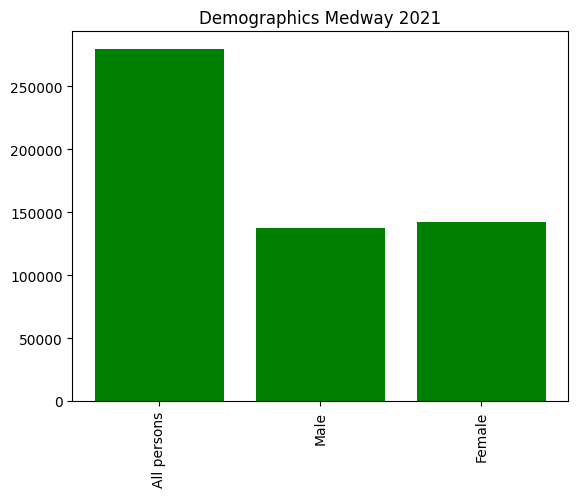

In [11]:
x = clean_data['measures']
y = clean_data['value']
bar_colour = "green"
topic = "Demographics"


## MAKE THE COLUMN CHART
plt.bar(x,y, color = bar_colour)
plt.title(topic + " " + geography + " " + year)
plt.xticks(rotation=90)

## SHOW THE CHART ONCE ALL SETTINGS HAVE BEEN CONFIGURED
plt.show()

### Create a pie chart from the data
---

Another appropriate way to visualise this data is a pie chart.  

Before you make a pie chart you will need to remove the first row.  This is because the first row in these data sets is the total of all the other rows.   If you don't remove it, it will always be half of the pie and the other half will show the breakdown)

A pie chart also needs:

*  values (the values column BUT REMOVE THE FIRST ROW - this is all people so shouldn't be in the pie chart)
*  labels (again, the first row should be removed
*  a title (same as for the bar chart)

The code below will do this.

,measures,value,percent
0,Male,137127,49.013665
1,Female,142646,50.986335


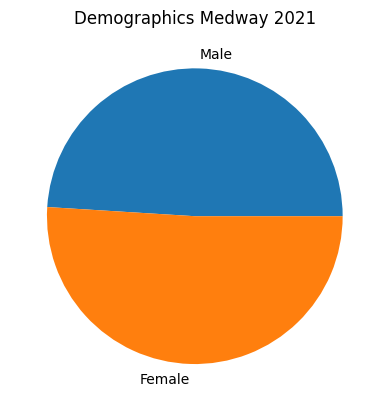

In [12]:
## REMOVE THE FIRST ROW AND SAVE AS A NEW DATATABLE
pie_data = clean_data.copy()
pie_data.drop(axis=0, index=0, inplace=True)
pie_data = pie_data.reset_index(drop=True)
display(pie_data)

## SET YOUR TOPIC
topic = "Demographics"

## CREATE THE PIE
data = pie_data['value']
labels = pie_data['measures']
plt.pie(data, labels = labels)
plt.title(topic + " " + geography + " " + year)


## SHOW THE CHART ONCE ALL SETTINGS HAVE BEEN CONFIGURED
plt.show()

# Playing with the charts
---

**If** you are keen to have a go with the code, you can get some easy going help on modifying the look of your charts here:

Bar charts  
https://www.w3schools.com/python/matplotlib_bars.asp

Pie charts  
https://www.w3schools.com/python/matplotlib_pie_charts.asp

# When you are happy with your charts, you can save them
Just **right-click** on a chart and save it in the downloads folder for now.